In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data_df = pd.read_csv('data-points.csv')

# Print shape
print('Shape:', data_df.shape) # (50, 2)

# First five rows
data_df.head()

Shape: (50, 2)


,x,y
0,0.000,0.706
1,0.020,0.288
2,0.041,0.645
3,0.061,1.272
4,0.082,1.238


In [4]:
x = data_df.x.values
y = data_df.y.values

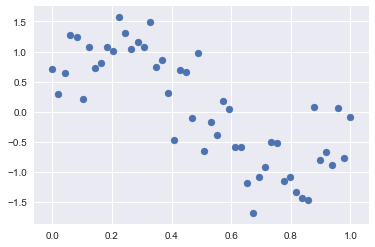

In [11]:
sns.set()
plt.scatter(x, y)
plt.show()

In [12]:
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X_poly.shape) # (50, 10)
print('Features:', poly_obj.get_feature_names())

Shape: (50, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [14]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, test_size=25, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape) # (25, 10) (25,)
print('Test set:', X_te.shape, y_te.shape) # (25, 10) (25,)

Train set: (25, 10) (25,)
Test set: (25, 10) (25,)


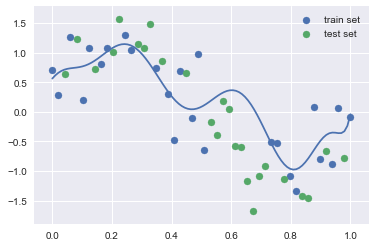

In [16]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# Plot the model
x_values = np.linspace(min(x), max(x), num=100)
x_values_poly = poly_obj.transform(x_values[:, np.newaxis])
y_values_lr = lr.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_lr)
plt.legend()
plt.show()

In [18]:
# Train score
y_pred = lr.predict(X_tr)
print('Train MSE: {:.2f}'.format(mse(y_tr, y_pred)))
# Prints: 0.18

# Test score
y_pred = lr.predict(X_te)
print('Test MSE: {:.2f}'.format(mse(y_te, y_pred)))
# Prints: 0.45

Train MSE: 0.18
Test MSE: 0.45


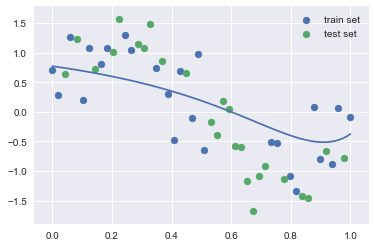

In [21]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_tr, y_tr)

# Plot the model
y_values_ridge = ridge.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_ridge)
plt.legend()
plt.show()

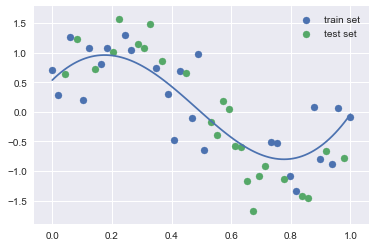

In [23]:
# Ridge regression
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_tr, y_tr)

# Plot the model
y_values_ridge2 = ridge2.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_ridge2)
plt.legend()
plt.show()

In [24]:
# Train score
y_pred = ridge2.predict(X_tr)
print('Train MSE: {:.2f}'.format(mse(y_tr, y_pred)))
# Prints: 0.19

# Test score
y_pred = ridge2.predict(X_te)
print('Test MSE: {:.2f}'.format(mse(y_te, y_pred)))
# Prints: 0.21

Train MSE: 0.19
Test MSE: 0.21


In [25]:
# Linear regression coefficients
features = poly_obj.get_feature_names()
for feature, coef in zip(features, lr.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 5.9
x0^2: -45.8
x0^3: -534.7
x0^4: 11490.9
x0^5: -73308.3
x0^6: 230833.5
x0^7: -404599.2
x0^8: 402333.8
x0^9: -212583.7
x0^10: 46407.0


In [26]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 4.9
x0^2: -14.8
x0^3: 0.8
x0^4: 7.5
x0^5: 4.6
x0^6: -0.0
x0^7: -2.4
x0^8: -2.2
x0^9: -0.5
x0^10: 1.6


C:\Users\jisnard.2015-JISNARD\Anaconda3\envs\exts-aml1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


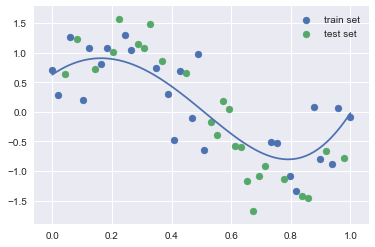

In [32]:
# Lasso regression
lasso = Lasso(alpha=1e-4)
lasso.fit(X_tr, y_tr)

# Plot the model
y_values_lasso = lasso.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_lasso)
plt.legend()
plt.show()

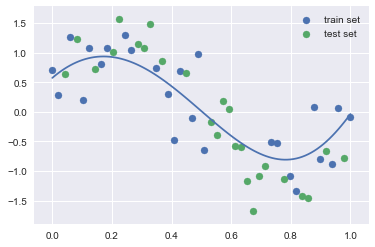

In [34]:
# Increase the number of iterations
lasso = Lasso(alpha=1e-4, max_iter=100000)
lasso.fit(X_tr, y_tr)

# Plot the model
y_values_lasso = lasso.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_lasso)
plt.legend()
plt.show()

In [35]:
for feature, coef in zip(features, lasso.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 4.3
x0^2: -13.1
x0^3: 0.0
x0^4: 8.8
x0^5: 0.0
x0^6: 0.0
x0^7: -0.0
x0^8: -0.0
x0^9: -0.0
x0^10: -0.7


### Grid Search

In [37]:
# Define a set of alpha values
alphas = np.logspace(-20, 10, num=100)
alphas

array([1.00000000e-20, 2.00923300e-20, 4.03701726e-20, 8.11130831e-20,
       1.62975083e-19, 3.27454916e-19, 6.57933225e-19, 1.32194115e-18,
       2.65608778e-18, 5.33669923e-18, 1.07226722e-17, 2.15443469e-17,
       4.32876128e-17, 8.69749003e-17, 1.74752840e-16, 3.51119173e-16,
       7.05480231e-16, 1.41747416e-15, 2.84803587e-15, 5.72236766e-15,
       1.14975700e-14, 2.31012970e-14, 4.64158883e-14, 9.32603347e-14,
       1.87381742e-13, 3.76493581e-13, 7.56463328e-13, 1.51991108e-12,
       3.05385551e-12, 6.13590727e-12, 1.23284674e-11, 2.47707636e-11,
       4.97702356e-11, 1.00000000e-10, 2.00923300e-10, 4.03701726e-10,
       8.11130831e-10, 1.62975083e-09, 3.27454916e-09, 6.57933225e-09,
       1.32194115e-08, 2.65608778e-08, 5.33669923e-08, 1.07226722e-07,
       2.15443469e-07, 4.32876128e-07, 8.69749003e-07, 1.74752840e-06,
       3.51119173e-06, 7.05480231e-06, 1.41747416e-05, 2.84803587e-05,
       5.72236766e-05, 1.14975700e-04, 2.31012970e-04, 4.64158883e-04,
      

In [38]:
# Save error on train/test sets
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)

    # Performance on train set
    y_pred = ridge.predict(X_tr)
    train_mse = mse(y_tr, y_pred)
    train_scores.append(train_mse)

    # Performance on test set
    y_pred = ridge.predict(X_te)
    test_mse = mse(y_te, y_pred)
    test_scores.append(test_mse)

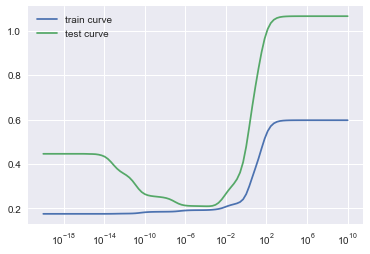

In [39]:
# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [40]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_score = test_scores[idx]

print('Best alpha value {:.1e} with score {:.2f}'.format(
    best_alpha, best_score))

Best alpha value 1.1e-04 with score 0.21
